In [1]:
import pandas as pd
import numpy as np
import json
import os
from os.path import join
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/train_df.csv",
    index_col=[0, 1],
    parse_dates=[1],
)

train_target = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/train_target.csv",
    index_col=[0, 1],
    parse_dates=[1]
)

In [4]:
val_df = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/val_df.csv",
    index_col=[0, 1],
    parse_dates=[1],
)

val_target = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/val_target.csv",
    index_col=[0, 1],
    parse_dates=[1]
)

test_df = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/test_df.csv",
    index_col=[0, 1],
    parse_dates=[1],
)

test_target = pd.read_csv(
    "/content/drive/MyDrive/LBNL_FDD_files/files/test_target.csv",
    index_col=[0, 1],
    parse_dates=[1]
)

In [5]:
df = pd.concat([train_df, val_df, test_df])
target = pd.concat([train_target, val_target, test_target])

In [6]:
df.head(5)

CHWC_VLV  CHWC_VLV_DM    MA_TEMP  \
fault_type Datetime                                                    
0          2018-01-01 01:00:00  2.635303e-21          0.0  66.374680   
           2018-01-01 01:01:00  2.479578e-21          0.0  66.374680   
           2018-01-01 01:02:00  2.380361e-21          0.0  66.374680   
           2018-01-01 01:03:00 -1.274259e-21          0.0  66.374626   
           2018-01-01 01:04:00  2.749987e-21          0.0  66.374626   

                                   OA_CFM  OA_DMPR  OA_DMPR_DM    OA_TEMP  \
fault_type Datetime                                                         
0          2018-01-01 01:00:00  357730.44      0.0         0.0  10.355011   
           2018-01-01 01:01:00  357730.44      0.0         0.0  10.040033   
           2018-01-01 01:02:00  357730.44      0.0         0.0  10.055031   
           2018-01-01 01:03:00  357730.44      0.0         0.0  10.070026   
           2018-01-01 01:04:00  357730.44      0.0         0.0  10.085022   

                                  RA_CFM  RA_DMPR  RA_DMPR_DM  ...  SF_CS  \
fault_type Datetime                                            ...          
0          2018-01-01 01:00:00  0.853194      1.0         1.0  ...    0.0   
           2018-01-01 01:01:00  0.853057      1.0         1.0  ...    0.0   
           2018-01-01 01:02:00  0.852918      1.0         1.0  ...    0.0   
           2018-01-01 01:03:00  0.852779      1.0         1.0  ...    0.0   
           2018-01-01 01:04:00  0.852641      1.0         1.0  ...    0.0   

                                SF_SPD  SF_SPD_DM        SF_WAT  SYS_CTL  \
fault_type Datetime                                                        
0          2018-01-01 01:00:00     0.9        0.0 -2.791519e-13      0.0   
           2018-01-01 01:01:00     0.9        0.0 -2.790612e-13      0.0   
           2018-01-01 01:02:00     0.9        0.0 -2.789696e-13      0.0   
           2018-01-01 01:03:00     0.9        0.0 -2.788807e-13      0.0   
           2018-01-01 01:04:00     0.9        0.0 -2.787895e-13      0.0   

                                ZONE_TEMP_1  ZONE_TEMP_2  ZONE_TEMP_3  \
fault_type Datetime                                                     
0          2018-01-01 01:00:00     73.94652    66.767230    67.027100   
           2018-01-01 01:01:00     73.97777    66.766680    67.025894   
           2018-01-01 01:02:00     74.00836    66.766014    67.024580   
           2018-01-01 01:03:00     74.03825    66.765305    67.023150   
           2018-01-01 01:04:00     74.06741    66.764530    67.021670   

                                ZONE_TEMP_4  ZONE_TEMP_5  
fault_type Datetime                                       
0          2018-01-01 01:00:00    66.761345    67.206566  
           2018-01-01 01:01:00    66.761290    67.207720  
           2018-01-01 01:02:00    66.761185    67.208760  
           2018-01-01 01:03:00    66.761020    67.209700  
           2018-01-01 01:04:00    66.760740    67.210570  

[5 rows x 30 columns]

In [26]:
for col in df.columns:
  print(col, df[col].nunique())

CHWC_VLV 4756474
CHWC_VLV_DM 1723043
MA_TEMP 718523
OA_CFM 1
OA_DMPR 885083
OA_DMPR_DM 904834
OA_TEMP 18674
RA_CFM 1718582
RA_DMPR 1156561
RA_DMPR_DM 959297
RA_TEMP 1649395
RF_CS 1591797
RF_SPD 1591797
RF_SPD_DM 2
RF_WAT 5484074
SA_CFM 4641783
SA_SP 161781
SA_SPSPT 2
SA_TEMP 610034
SA_TEMPSPT 1
SF_CS 1570181
SF_SPD 1
SF_SPD_DM 2
SF_WAT 5427598
SYS_CTL 2
ZONE_TEMP_1 481552
ZONE_TEMP_2 541263
ZONE_TEMP_3 548558
ZONE_TEMP_4 541282
ZONE_TEMP_5 544214


In [32]:
df['SA_TEMPSPT'].unique()

array([55.184006])

In [27]:
for col in df.columns:
  print(col)
  for i in range(21):
    print(f"{i}: {df[col].loc[i].mean()}")
  print()

CHWC_VLV
0: 0.20794932439854155
1: 0.1484864441004843
2: 0.10542001864977665
3: 0.26318473218221033
4: 0.3515442471762046
5: 0.27465036893746436
6: 0.27465036893746436
7: 0.27465036893746436
8: 0.27465036893746436
9: 0.09999999999999991
10: 0.25
11: 0.5
12: 0.75
13: 0.3151251229274234
14: 0.31397828922471294
15: 0.19291166349416125
16: 0.2876785093491366
17: 0.1999655077369292
18: 0.1999655077369292
19: 0.1999655077369292
20: 0.1999655077369292

CHWC_VLV_DM
0: 0.20803253755133405
1: 0.14830179785379044
2: 0.10521354660503274
3: 0.2628935338770132
4: 0.3511391747707682
5: 0.21110436588187498
6: 0.21110436588187498
7: 0.21110436588187498
8: 0.21110436588187498
9: 0.49762503961538596
10: 0.4215988088613729
11: 0.32360537820602014
12: 0.00129476289711021
13: 0.3148044318567778
14: 0.3136547493839365
15: 0.19273077983587128
16: 0.28740339121883146
17: 0.19973643889629397
18: 0.19973643889629397
19: 0.19973643889629397
20: 0.19973643889629397

MA_TEMP
0: 65.76349968461773
1: 64.7642853030501

<Axes: xlabel='Datetime'>

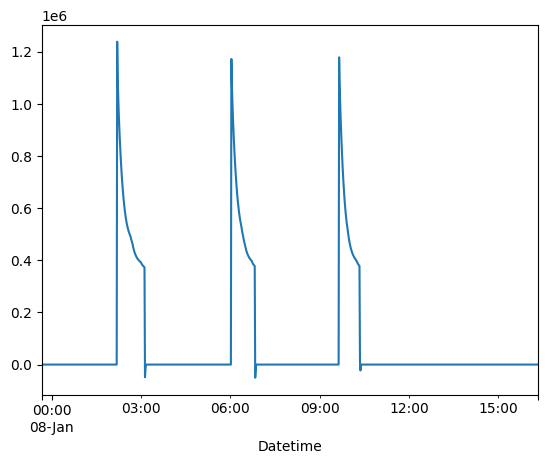

In [23]:
df.loc[1]['RA_CFM'][10000:11000].plot()

<Axes: xlabel='Datetime'>

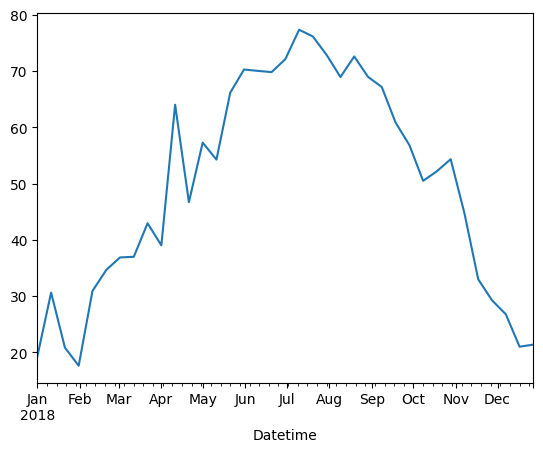

In [27]:
daily_mean = (
    df.loc[3]
    .groupby(pd.Grouper(level='Datetime', freq='10D'))
    .mean()
)
daily_mean['OA_TEMP'].plot()

<Axes: xlabel='Datetime'>

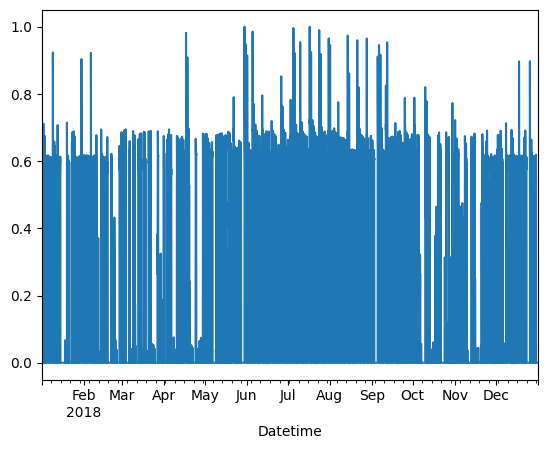

In [16]:
df.loc[0]['CHWC_VLV'].plot()

In [7]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_df.shape[0], val_df.shape[0]

(6284340, 1808640)

In [6]:
import random

train_indices = random.sample(range(train_df.shape[0]), 10000)
train_df_indices = train_df.iloc[train_indices]
train_target_indices = train_target.iloc[train_indices]

val_indices = random.sample(range(val_df.shape[0]), 10000)
val_df = val_df.iloc[val_indices]
val_target = val_target.iloc[val_indices]

In [8]:
scaler = StandardScaler()
scaler.fit(train_df.values)
train_df_scaled = train_df.copy()
train_df_scaled[:] = scaler.transform(train_df.values)

val_df_scaled = val_df.copy()
val_df_scaled[:] = scaler.transform(val_df.values)

test_df_scaled = test_df.copy()
test_df_scaled[:] = scaler.transform(test_df.values)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in [1, 2, 3, 5, 10]:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(train_df_scaled, train_target.values.ravel())
  val_pred = knn.predict(val_df_scaled)
  print(f"n_neighbors: {n_neighbors}")
  print(f"Accuracy: {accuracy_score(val_target.values.ravel(), val_pred)}")
  print(f"F1: {f1_score(val_target.values.ravel(), val_pred, average='macro')}")

n_neighbors: 1
Accuracy: 0.6162
F1: 0.56614108161218
n_neighbors: 2
Accuracy: 0.6169
F1: 0.5674859924763511
n_neighbors: 3
Accuracy: 0.6172
F1: 0.5677532967721874
n_neighbors: 5
Accuracy: 0.6173
F1: 0.5844792101928116
n_neighbors: 10
Accuracy: 0.6145
F1: 0.5821660081488241


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_df_scaled, train_target.values.ravel())

KNeighborsClassifier()

In [11]:
from sklearn.metrics import accuracy_score, f1_score

val_pred = knn.predict(val_df_scaled)
print(f"Accuracy: {accuracy_score(val_target.values.ravel(), val_pred)}")
print(f"F1: {f1_score(val_target.values.ravel(), val_pred, average='macro')}")

Accuracy: 0.6158
F1: 0.5833835518282982


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train_df_scaled, train_target.values.ravel())

In [ ]:
val_pred = rf.predict(val_df_scaled)
print(f"Accuracy: {accuracy_score(val_target.values.ravel(), val_pred)}")
print(f"F1: {f1_score(val_target.values.ravel(), val_pred, average='macro')}")

Accuracy: 0.5916
F1: 0.5657028758939563


In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=100)
lr.fit(train_df_scaled.iloc[train_indices], train_target.iloc[train_indices].values.ravel())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, f1_score

In [25]:
val_pred = lr.predict(val_df_scaled)
print(f"Accuracy: {accuracy_score(val_target.values.ravel(), val_pred)}")
print(f"F1: {f1_score(val_target.values.ravel(), val_pred, average='macro')}")

Accuracy: 0.0518
F1: 0.04699067226188541
